<center>

<h1 style="color: red; font-size: 70px;">Studio condizioni iniziali</h1>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

<h1 style="color: blue; font-size: 50px;"> Densità di particelle </h1>

Dato che il collasso della nube gravitazionale porta ad una regione a densità più elevata nel centro della stessa, non ha senso scegliere una densità di particelle iniziale uniforme. Infatti lavoreremo con una densità di probabilità decrescente del tipo:

$$
\sigma \, \propto \, \exp{\left[-\left(r\,-\,r_0\right)^n\right]}
$$

al di fuori di un certo raggio caratteristico $r_0$.

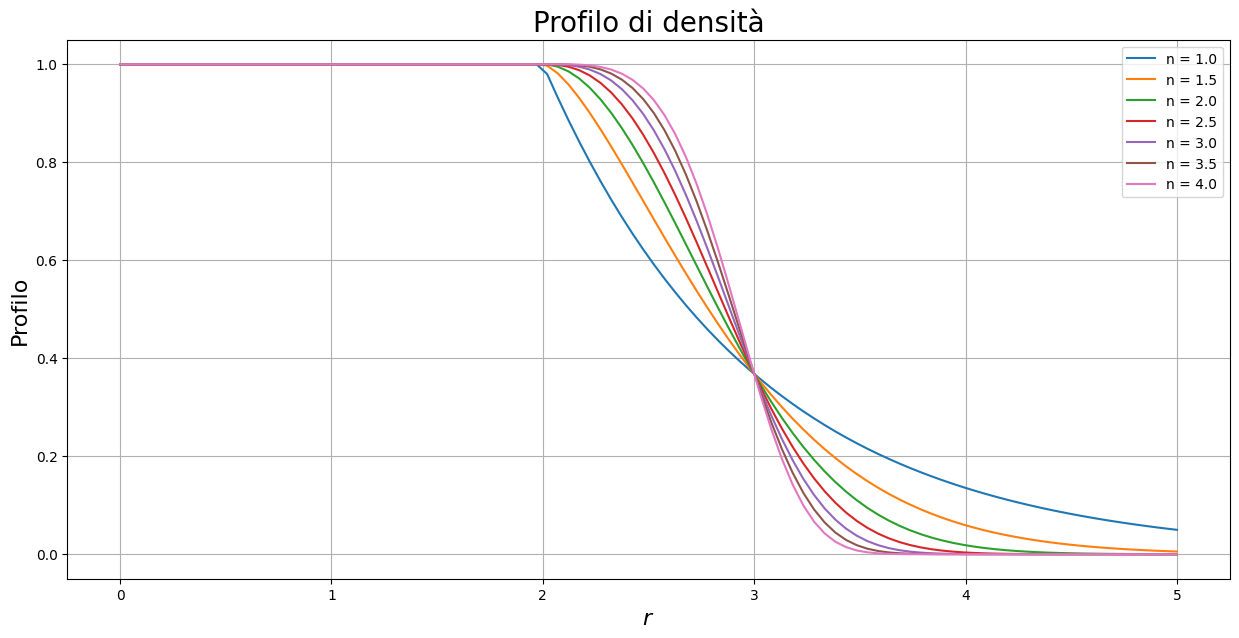

In [17]:
# Funzione per la densità di probabilità
def prof(x, r0, n):
    res = np.zeros(len(x))
    for k, i in enumerate(x):
        appo = 1
        if i > r0:
            appo = np.exp(-np.pow((i-r0), n))
        res[k] = appo
    return res


x = np.linspace(0.0, 5.0, 100)
esp = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
fig = plt.figure(figsize = (15, 7))

for es in esp:
    plt.plot(x, prof(x, 2, es), label = "n = " + str(es))

plt.title('Profilo di densità', fontsize = 20)
plt.ylabel(r'Profilo', fontsize = 16)
plt.xlabel(r'$r$', fontsize = 16)
plt.legend(loc="best")
plt.grid(True)

plt.show()

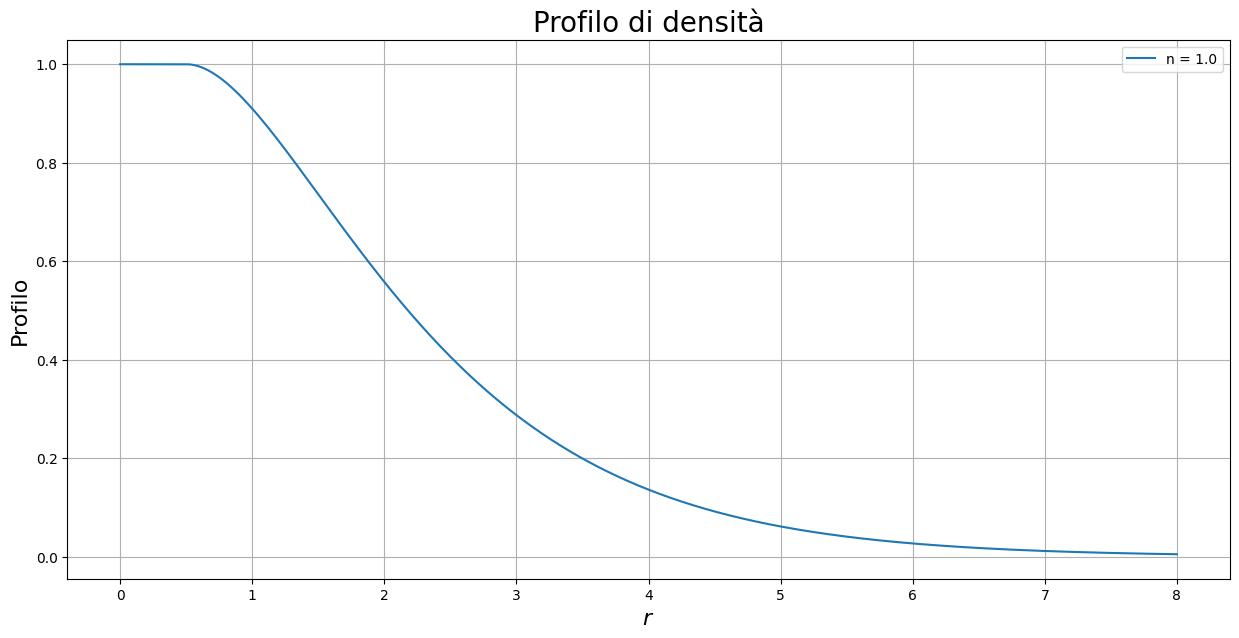

In [21]:
# Funzione per la densità di probabilità
def prof(x, r0, n):
    res = np.zeros(len(x))
    for k, i in enumerate(x):
        appo = 1
        if i > r0:
            appo = (i+1-r0)*np.exp(-np.pow((i-r0), n))
        res[k] = appo
    return res


x = np.linspace(0.0, 8.0, 1000)
fig = plt.figure(figsize = (15, 7))

plt.plot(x, prof(x, 0.5, 1.0), label = "n = 1.0")
plt.title('Profilo di densità', fontsize = 20)
plt.ylabel(r'Profilo', fontsize = 16)
plt.xlabel(r'$r$', fontsize = 16)
plt.legend(loc="best")
plt.grid(True)

plt.show()

### Metodo implementato

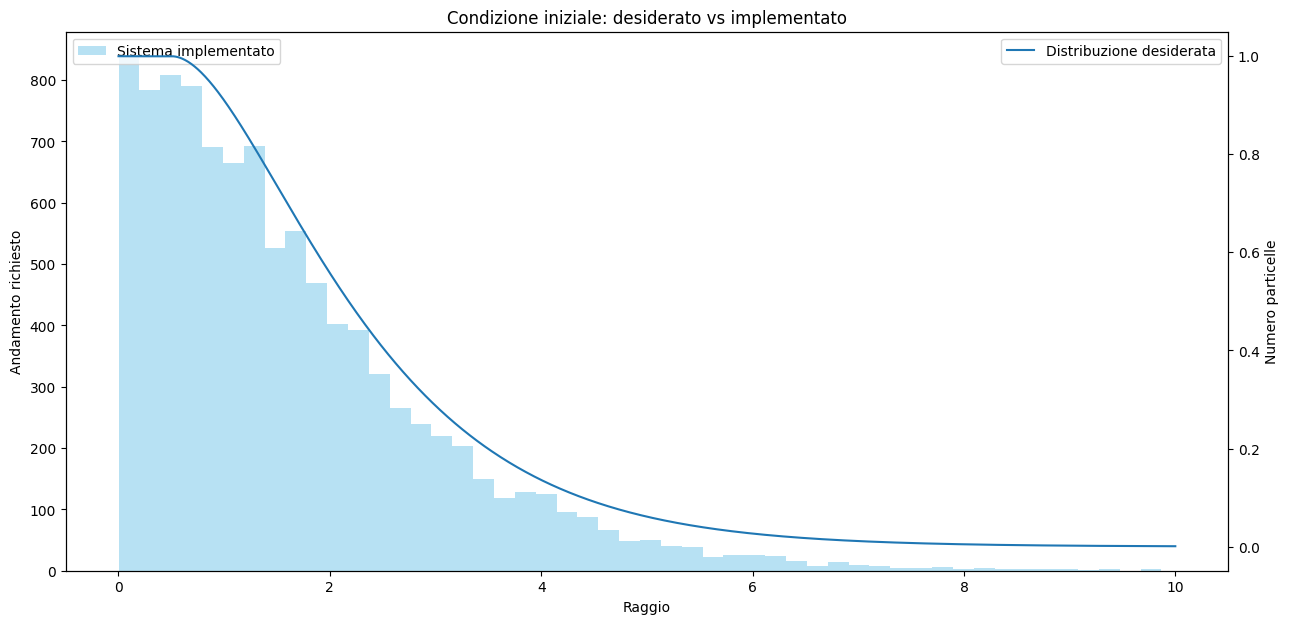

In [6]:
# Funzione per la densità di probabilità
def prof(x, r0, n):
    res = np.zeros(len(x))
    for k, i in enumerate(x):
        appo = 1
        if i > r0:
            appo = (i+1-r0)*np.exp(-np.pow((i-r0), n))
        res[k] = appo
    return res



conf = np.loadtxt("condin.conf")
x = np.linspace(0.0, 10.0, 1000)

# Creiamo la figura e gli assi
fig, ax1 = plt.subplots(figsize = (15, 7))

# Primo asse: istogramma
ax1.hist(conf[:, 1], bins=50, color='skyblue', alpha=0.6, label='Sistema implementato')

# Secondo asse (stesso asse x)
ax2 = ax1.twinx()  # crea un secondo asse y
plt.plot(x, prof(x, 0.5, 1.0), label = "Distribuzione desiderata")

# Aggiungiamo etichette e legenda
ax1.set_xlabel('Raggio')
ax1.set_ylabel('Andamento richiesto')
ax2.set_ylabel('Numero particelle')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Condizione iniziale: desiderato vs implementato')
plt.show()


<h1 style="color: blue; font-size: 50px;"> Profilo di velocità </h1>

Per quanto riguarda il profilo di velocità iniziale, scegliamo delle velocità azimutali coerenti con l'approccio precedentemente indicato per la densità. Dato che:

$$
\rho(r) = 
\begin{cases}
1 \qquad \qquad \qquad \qquad \qquad \qquad \, r < 0.5 \\
(r+0.5)\exp{\left[-(r-0.5)\right]} \qquad r > 0.5
\end{cases}
$$

la massa in funzione del raggio r è data da

$$
M(<r) = 
\begin{cases}
\pi r^2 \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad r < 0.5 \\
\pi \left\{8.25\,-\,(2r^2+5r+5)\exp{\left[-(r-0.5)\right]}\right\}\qquad r > 0.5
\end{cases}
$$

che si traduce in una velocità azimutale pari a

$$
v(r) = 
\begin{cases}
\sqrt{\pi r} \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \,\, r < 0.5 \\
\sqrt{\pi \left\{8.25\,-\,(2r^2+5r+5)\exp{\left[-(r-0.5)\right]}\right\}/r}\qquad r > 0.5
\end{cases}
$$

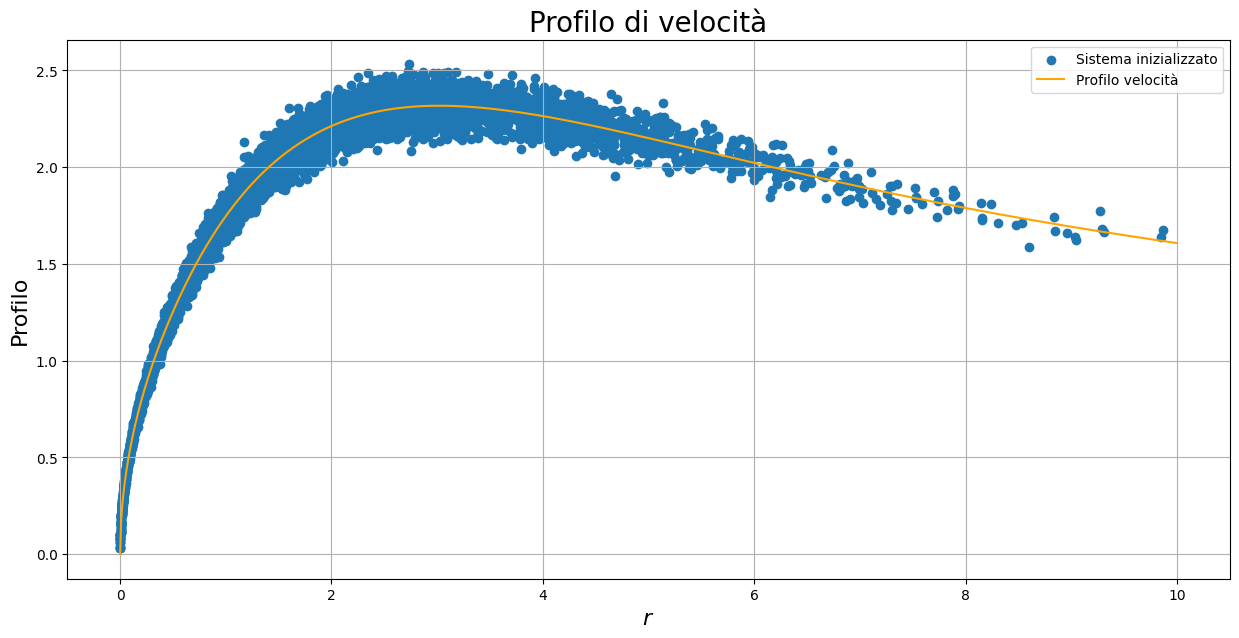

In [10]:
# Funzione per la densità di probabilità
def prof(x, r0, n):
    res = np.zeros(len(x))
    for k, i in enumerate(x):
        appo = np.sqrt(np.pi * i)
        if i > r0:
            appo = np.sqrt(np.pi * (8.25 - (2*i**2+5*i+5)*np.exp(-(i-0.5)))/i)
        res[k] = appo
    return res

conf = np.loadtxt("condin.conf")
x = np.linspace(0.0, 10.0, 1000)
fig = plt.figure(figsize = (15, 7))

plt.scatter(conf[:, 1], conf[:, 4], label = "Sistema inizializzato")
plt.plot(x, prof(x, 0.5, 1.0), color = 'orange', label = "Profilo velocità")
plt.title('Profilo di velocità', fontsize = 20)
plt.ylabel(r'Profilo', fontsize = 16)
plt.xlabel(r'$r$', fontsize = 16)
plt.legend(loc="best")
plt.grid(True)

plt.show()